<a href="https://colab.research.google.com/github/luciaemiliaeu/Enem2019/blob/main/Enem2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches
import seaborn as sns

###Base de dados do Enem 2019

In [3]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [4]:
dados.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Data columns (total 136 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NU_INSCRICAO                 127380 non-null  int64  
 1   NU_ANO                       127380 non-null  int64  
 2   CO_MUNICIPIO_RESIDENCIA      127380 non-null  int64  
 3   NO_MUNICIPIO_RESIDENCIA      127380 non-null  object 
 4   CO_UF_RESIDENCIA             127380 non-null  int64  
 5   SG_UF_RESIDENCIA             127380 non-null  object 
 6   NU_IDADE                     127380 non-null  int64  
 7   TP_SEXO                      127380 non-null  object 
 8   TP_ESTADO_CIVIL              127380 non-null  int64  
 9   TP_COR_RACA                  127380 non-null  int64  
 10  TP_NACIONALIDADE             127380 non-null  int64  
 11  CO_MUNICIPIO_NASCIMENTO      123757 non-null  float64
 12  NO_MUNICIPIO_NASCIMENTO      123757 non-null  object 
 13

# Definição de funções, dicionários e variáveis.

In [5]:
cmap = plt.get_cmap("Set3")
def annotate_vertical(graph, rects, pad):
  if pad == None : pad = 0
  for rect in rects:
    height = rect.get_height()
    graph.annotate('{0:.2f}%'.format(height*100),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(pad, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
def annotate_horizontal(graph, rects):
  for rect in rects:
    width = rect.get_width()
    graph.annotate('{0:.2f}%'.format(width*100),
                xy=( rect.get_x() + rect.get_width()/2, 
                    rect.get_y() + rect.get_height()/2),
                xytext=(-0.5, -0.5), color='w',
                textcoords="offset points")
    
def annotate_horizontal_absolute(graph, rects):
  for rect in rects:
    width = rect.get_width()
    graph.annotate('{}'.format(width),
                xy=( rect.get_x() + rect.get_width(), 
                    rect.get_y()+rect.get_height()/4 ),
                xytext=(1,0),
                textcoords="offset points")
        
def format_vertical(graph, labels, x):
  graph.set_xticks(x)
  graph.set_xticklabels(labels)
  graph.spines['right'].set_visible(False)
  graph.spines['top'].set_visible(False)
  graph.spines['left'].set_visible(False)
  graph.get_yaxis().set_visible(False)
  graph.set_ylim(0,1)

def format_horizontal_bar(graph, labels, y):
  graph.set_yticks(y)
  graph.set_yticklabels(labels)
  graph.spines['right'].set_visible(False)
  graph.spines['top'].set_visible(False)
  graph.spines['bottom'].set_visible(False)
  graph.get_xaxis().set_visible(False)

In [6]:
data_censo = 'https://github.com/luciaemiliaeu/Enem2019/blob/main/tab1_4.xls?raw=true'
censo_demografico_2010 = pd.read_excel(data_censo, header=4, index_col=0, 
                                       na_filter=False, skipfooter=2)
censo_demografico_regioes = censo_demografico_2010['01.08.2010\n(3)'][['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']]

In [7]:
regioes= {'AM': 'Norte', 'RR':'Norte', 'AP':'Norte', 'PA':'Norte', 'RO':'Norte',
          'TO':'Norte', 'AC':'Norte',
          'PI': 'Nordeste', 'MA':'Nordeste', 'CE':'Nordeste', 'RN':'Nordeste',
          'PE':'Nordeste', 'PB':'Nordeste', 'SE':'Nordeste', 'AL':'Nordeste',
          'BA':'Nordeste',
          'PR': 'Sul', 'RS':'Sul', 'SC':'Sul', 
          'SP': 'Sudeste', 'RJ':'Sudeste', 'ES':'Sudeste', 'MG':'Sudeste',
          'MT': 'Centro-Oeste', 'MS':'Centro-Oeste', 'GO':'Centro-Oeste', 
          'DF':'Centro-Oeste', 
          }

regioes_colors = {'Norte':1, 'Nordeste': 2, 'Sul': 3,
                  'Sudeste': 4, 'Centro-Oeste': 5}

# Análise exploratória do perfil de inscritos
A primeira análise desempenhada tem como objetivo mapear a distribuição geográfica dos inscritos. 
O gráfico 1 apresenta o número absoluto de inscritos em cada estado. O gráfico 2 apresenta a proporção de inscritos em cada região do país. 
Para avaliar se a distribuição das amostras condiz com a distribuição da população, comparamos os resultados com as informações do censo demorgáfico de 2010 [1] (o mais recente levantamento do IBGE), como mostra o gráfico 3. 


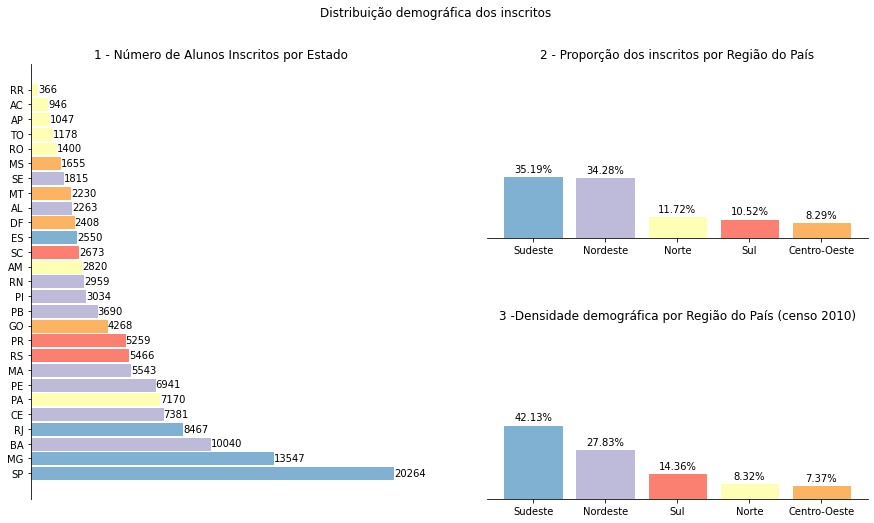

In [8]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Distribuição demográfica dos inscritos')
gspec = gridspec.GridSpec(2,2)
plt.subplots_adjust(hspace=0.5)

barChart_inscritos_por_estado = plt.subplot(gspec[0:,0])
num_inscritos_por_estado = dados['SG_UF_RESIDENCIA'].value_counts()
bars= barChart_inscritos_por_estado.barh(num_inscritos_por_estado.index, 
                                         num_inscritos_por_estado.values)
barChart_inscritos_por_estado.set_title('1 - Número de Alunos Inscritos por Estado')
format_horizontal_bar(barChart_inscritos_por_estado, 
                num_inscritos_por_estado.index , 
                np.arange(len(num_inscritos_por_estado)))
annotate_horizontal_absolute(barChart_inscritos_por_estado, bars)
for bar, estado in zip(bars, num_inscritos_por_estado.index):
  bar.set_color(cmap(regioes_colors[regioes[estado]]))

barChart_inscritos_por_regiao = plt.subplot(gspec[0,1])  
dados['Região'] = dados.apply(lambda x: regioes[x.SG_UF_RESIDENCIA], axis=1)
proporcao_inscritos_regiao = dados['Região'].value_counts(normalize=True)
bars = barChart_inscritos_por_regiao.bar(proporcao_inscritos_regiao.index, 
                                         proporcao_inscritos_regiao.values)
barChart_inscritos_por_regiao.set_title('2 - Proporção dos inscritos por Região do País')
format_vertical(barChart_inscritos_por_regiao, 
                proporcao_inscritos_regiao.index , 
                np.arange(len(proporcao_inscritos_regiao)))
annotate_vertical(barChart_inscritos_por_regiao, bars, pad=None)
for bar, regiao in zip(bars, proporcao_inscritos_regiao.index):
  bar.set_color(cmap(regioes_colors[regiao]))

barChart_demografia_regiao = plt.subplot(gspec[1,1])
demografia_regiões = (censo_demografico_regioes
                      .sort_values(ascending=False))
bars = barChart_demografia_regiao.bar(demografia_regiões.index,
                                      demografia_regiões.values/demografia_regiões.sum())
barChart_demografia_regiao.set_title('3 -Densidade demográfica por Região do País (censo 2010)')
format_vertical(barChart_demografia_regiao, 
                demografia_regiões.index , 
                np.arange(len(demografia_regiões)))
annotate_vertical(barChart_demografia_regiao, bars, pad=None)
for bar, regiao in zip(bars, demografia_regiões.index):
  bar.set_color(cmap(regioes_colors[regiao]))

plt.show()

Algumas observações podem ser feitas: 
- Sudeste e Nordeste concentram a maior proporção de inscritos, bem como seus estados individualmente. 
- A região Norte, apesar de ser a terceira no ranking de regiões com maior proporção de inscritos e a quarta em densidade demográfica, representa os 5 estados com menor número de inscritos individualmente. 
- Em relação a proporção de inscritos por região, o Norte e o Sul representam proporções similares, mas se observarmos a densidade demográfica dessas regiões, o Sul é 6.04% mais populoso que  Norte.


Outra variável a ser analisada é a idade dos participantes do Enem 2019.


4


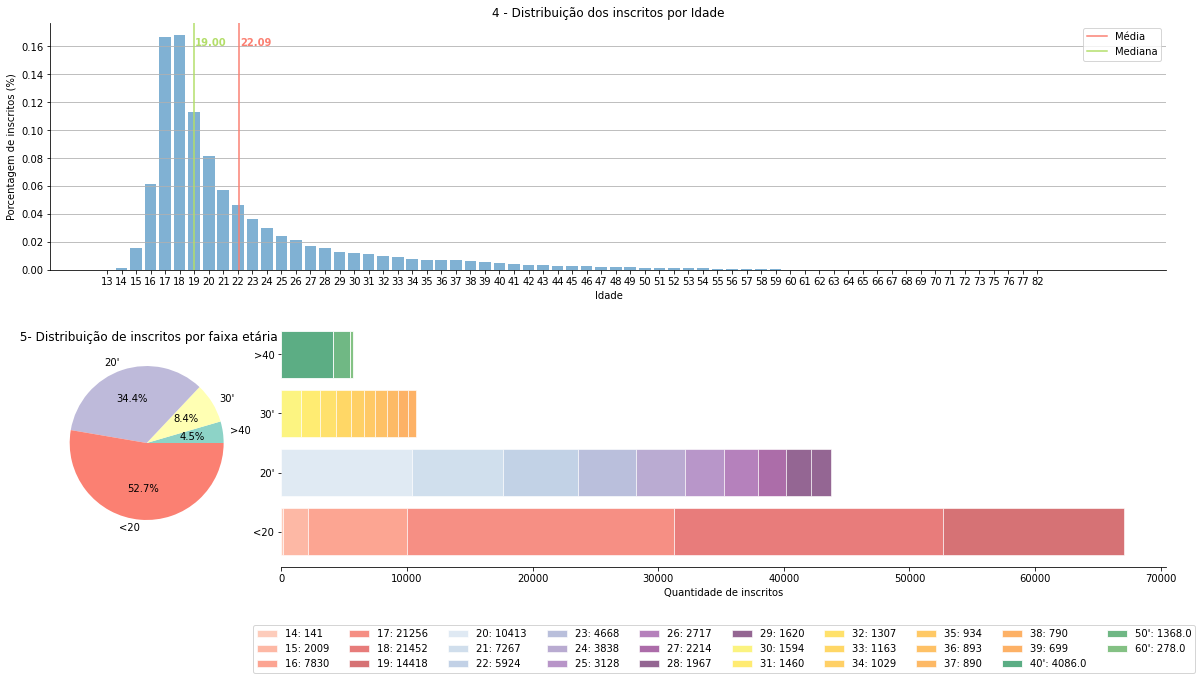

In [9]:
fig = plt.figure(figsize=(20,10))
gspec = gridspec.GridSpec(4,5)
plt.subplots_adjust(hspace=0.5)

#Plotagem da proporção de inscritos por idade
idade = dados['NU_IDADE'].value_counts().sort_index()
proporcao = dados['NU_IDADE'].value_counts(normalize=True).sort_index()
top_histogram = plt.subplot(gspec[0:2,0:])
top_histogram.bar(proporcao.index, proporcao.values, color= cmap(4))
top_histogram.axvline(x=dados['NU_IDADE'].mean(),  color=cmap(3), label='Média')
top_histogram.annotate('{0:.2f}'.format(dados['NU_IDADE'].mean()), 
                       xy=(dados['NU_IDADE'].mean(), 0.16),
                       xytext=(1, 0.5),textcoords="offset points",
                       color=cmap(3), weight='bold')
top_histogram.axvline(x=dados['NU_IDADE'].median(),  color=cmap(6), label='Mediana')
top_histogram.annotate('{0:.2f}'.format(dados['NU_IDADE'].median()), 
                       xy=(dados['NU_IDADE'].median(), 0.16),
                       xytext=(1, 0.5),textcoords="offset points",
                       color=cmap(6), weight='bold')
top_histogram.legend()

x = range(proporcao.index.min(),proporcao.index.min()+ len(proporcao))
top_histogram.set_xticks(x)
top_histogram.set_xticklabels(proporcao.index)
top_histogram.set_ylabel('Porcentagem de inscritos (%)')
top_histogram.set_xlabel('Idade')
top_histogram.spines['right'].set_visible(False)
top_histogram.spines['top'].set_visible(False)
top_histogram.grid(axis='y')
top_histogram.set_title('4 - Distribuição dos inscritos por Idade')

#Plotagem do gráfico de pizza com a porcentagem de inscritos por faixa etária
side_pieChart = plt.subplot(gspec[2:,0])
def faixa(x):
  if x >=13 and x <=19: return "<20"
  elif x <=29: return "20'"
  elif x <=39: return "30'"
  else: return ">40"

proporcao_2 = pd.DataFrame(idade)
proporcao_2['Rate_NU_IDADE'] = proporcao_2['NU_IDADE']*0.01
proporcao_2['Idade'] = proporcao_2.index
proporcao_2 = proporcao_2.reset_index(drop=True)
proporcao_2['FaixaEtaria'] = proporcao_2.apply(lambda x: faixa(x.Idade), axis=1)
faixaEtaria = (proporcao_2.
               groupby('FaixaEtaria').
               agg("sum").
               sort_values(by='Rate_NU_IDADE'))
side_pieChart.pie(faixaEtaria['Rate_NU_IDADE'], autopct='%1.1f%%', 
                  labels= faixaEtaria.index, colors = cmap(np.arange(4)))
side_pieChart.set_title(' 5- Distribuição de inscritos por faixa etária')

#Plotagem do gráfico de barras dividido por faixa etária
def decada(x):
  if x <=49: return "40'"
  elif x <=59: return "50'"
  elif x <=69: return "60'"
  elif x <=79: return "70'"
  else: return "80'"

barChart_faixaEtaria = plt.subplot(gspec[2:,1:])
colors = ['Reds', 'BuPu', 'Wistia', 'summer']
for faixa, color in zip(proporcao_2['FaixaEtaria'].unique(), colors):
  c = plt.get_cmap(color)
  bottom = 0
  if faixa !=  ">40":
    proporcao_3 = (proporcao_2[proporcao_2['FaixaEtaria'] == faixa].
                   set_index("Idade", drop=True).
                   T.
                   drop(['FaixaEtaria', 'Rate_NU_IDADE']))
    for column, cl in zip(proporcao_3.columns, range(len(proporcao_3.columns))):
      height = proporcao_3[column]['NU_IDADE']
      if height > 100:
        barChart_faixaEtaria.barh(faixa, width=height, 
                                  label='{}: {}'.format(column,height),
                                  left=bottom, color=c(0.1*cl+0.2),
                                  edgecolor='w', alpha=0.6)
        bottom += proporcao_3[column]
      else: print(height)
  else:
    proporcao_3 = (proporcao_2.
                   loc[proporcao_2[proporcao_2['FaixaEtaria'] == faixa].index])
    proporcao_3['Decada_Idade'] = proporcao_2.apply(lambda x: decada(x.Idade), axis=1)
    proporcao_3 = (proporcao_3.
                   groupby('Decada_Idade').
                   agg("sum").
                   T.
                   drop(['Rate_NU_IDADE', 'Idade']).
                   rename(index={'NU_IDADE':">40"}))
    for column, cl in zip(proporcao_3.columns, range(len(proporcao_3.columns))):
      height = proporcao_3[column].to_numpy()[0]
      if height > 100:
        barChart_faixaEtaria.barh(">40", width=height,
                                  label='{}: {}'.format(column,height), 
                                  left=bottom, color=c(0.1*cl+0.2), 
                                  edgecolor='w', alpha=0.8)
        bottom += proporcao_3[column]

barChart_faixaEtaria.legend( bbox_to_anchor=(0.5,-0.43), loc='lower center', 
                            borderaxespad=0., ncol=10)
barChart_faixaEtaria.spines['right'].set_visible(False)
barChart_faixaEtaria.spines['top'].set_visible(False)
barChart_faixaEtaria.spines['left'].set_visible(False)
barChart_faixaEtaria.set_xlabel('Quantidade de inscritos')
plt.show()


O gráfico 4 apresenta a porcentagem de incritos por idade, nele podemos ver a presença de inscritos com idades entre 13 e 82 anos numa distribuição com assimetria positiva, com mediana em 19 anos e média em 22.09. 

Devido ao tamanho desse intervalo, analisamos também a proporção de inscritos por faixa etária, como mostra o gráfico 5. Os inscritos foram divididos nos intervalos: 

*  Menor de 20 anos (<20) - correspondente a 52.7% da amostras,
*  Entre 20 e 29 anos (20') - correspondente a 34.4% da amostras,
*  Entre 30 e 39 anos (30') - correspondente a 8.4% da amostras,
*  Acima de 40 anos (>40) - correspondente a 4.5% da amostras.

Para a faixa etária Acima de 40 anos, os dados foram agrupados por décadas (50', 60', 70', 80'). O número de amostras por valor de cada intervalo é também apresentado no gráfico de barras ao lado. Inscritos com 13 anos e acima de 70 não foram plotados no gráfico de barras por representarem menos de 100 alunos, tornando inperceptível sua proporção.
* 13 : 4 inscritos
* 70': 22 inscritos
* 80': 1 inscrito

Como esperado, inscritos com menos de 20 anos representam a maior proporção, diminuindo conforme a idade aumenta. 



# Análise exploratória dos incritos com menos de 17 anos de idade
Na análise da idade dos inscritos no Enem 2019 podemos perceber a presença significativa de alunos com menos de 17 anos (13-17 anos), representando  7.84%  do total de inscritos. Segundo a orientação do Ministério da Educação sobre a idade ideal de entrada de alunos na educação básica [2], e consequntemente a idade de saída desses alunos, estudantes nessa faixa etária não estão em processo de conclusão do Ensino Médio e, portanto, não deveriam estar prestando vestibular, o que levanta um questionamentos sobre o perfil desses alunos.

Desso modo, as análises a seguir comparam as características dos inscritos nessa faixa etária com a amostra total da base de dados, de modo de identificar quais delas diferenciam esses alunos dos demais.

In [10]:
dados['Menor_17'] = dados.apply(lambda x: x.NU_IDADE<17, axis=1)
alunos_menores_17 = dados[dados['Menor_17']]


In [11]:
alunos_menores_17.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 4 to 127371
Data columns (total 138 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NU_INSCRICAO                 9984 non-null   int64  
 1   NU_ANO                       9984 non-null   int64  
 2   CO_MUNICIPIO_RESIDENCIA      9984 non-null   int64  
 3   NO_MUNICIPIO_RESIDENCIA      9984 non-null   object 
 4   CO_UF_RESIDENCIA             9984 non-null   int64  
 5   SG_UF_RESIDENCIA             9984 non-null   object 
 6   NU_IDADE                     9984 non-null   int64  
 7   TP_SEXO                      9984 non-null   object 
 8   TP_ESTADO_CIVIL              9984 non-null   int64  
 9   TP_COR_RACA                  9984 non-null   int64  
 10  TP_NACIONALIDADE             9984 non-null   int64  
 11  CO_MUNICIPIO_NASCIMENTO      9688 non-null   float64
 12  NO_MUNICIPIO_NASCIMENTO      9688 non-null   object 
 13  CO_UF_NASCIMENT


## Distribuição geográfica

A distribuição inscritos menores de 17 anos por região do país (Gráfio 6) é similar a de inscritos totais (Vide o Gráfio 2). Ou seja, em relação as regiões, a amostra dos dados correpondente aos incritos com menos de 17 anos pode ser considerada um amostra bem distribuída da base de dados. Outra maneira de visualizar esta relação é observando a proporção de inscritos em cada região com menos de 17 anos, como mostra o gráfico 7, cuja variação é de apenas 2.57 pontos percentuais.

Considerando a proporção média de alunos com menos de 17 anos de 7.84 para cada 100 inscritos, 12 dos 27 estados superam a média: Tocantins, Goiás, Paraná, Pernabuco, Mato Grosso, Mato Grosso do Sul, Sergipe, Paraíba, Piauí, Ceará, Santa Catarina e São Paulo:
* 2 dos 3 estados do Sul,
* 1 do Norte,
* 1 do Sudeste,
* 3 dos 4 estados do centro-oeste e 
* 5 dos 9 estados do Nordeste. 

O Tocantins é o estado com maior proporção de inscritos com menos de 17 anos (11.29%), destacando-se entre os estados do Norte: tanto os estados com mais inscritos (PA, RO e AM), quanto os com menor número de inscritos (RR, AC e AP), apresentam proporções bem menores de alunos com menos de 17 anos. 

São Paulo, Ceará e Pernambuco também aparecem entre os 10 estados com maior quantidade de inscritos, ou seja, além de muitos inscritos, as taxas de inscritos menores de 17 anos também são altas. 


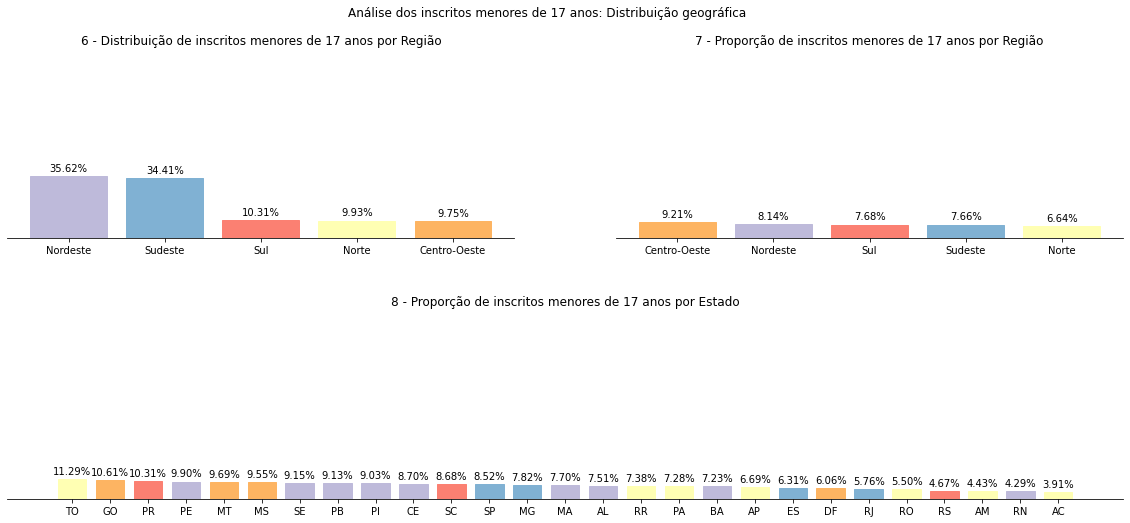


	Média nacional: 7.84 para cada 100 inscritos.


In [12]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(2,2)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Análise dos inscritos menores de 17 anos: Distribuição geográfica')

#Plotagem da distribuição de inscritos menores de 17 anos por região
barChart_distribuicao_regiao = plt.subplot(gspec[0,0])
distribuicao_alunos_menores_por_regiao = (alunos_menores_17['Região'].
                                          value_counts(normalize=True))
bars = barChart_distribuicao_regiao.bar(distribuicao_alunos_menores_por_regiao.index,
                                        distribuicao_alunos_menores_por_regiao)
barChart_distribuicao_regiao.set_title('6 - Distribuição de inscritos menores de 17 anos por Região',
                           pad=20)
format_vertical(barChart_distribuicao_regiao, 
                distribuicao_alunos_menores_por_regiao.index, 
                barChart_distribuicao_regiao.get_xticks())
annotate_vertical(barChart_distribuicao_regiao, bars, None)
for bar, regiao in zip(bars, distribuicao_alunos_menores_por_regiao.index):
  bar.set_color(cmap(regioes_colors[regiao]))

#Plotagem da proporção inscritos menores de 17 anos por região
barChart_regiao = plt.subplot(gspec[0,1])
proporcao_alunos_menores_por_regiao = (alunos_menores_17['Região'].value_counts().sort_index() /
                                       dados['Região'].value_counts().sort_index())
proporcao_alunos_menores_por_regiao = proporcao_alunos_menores_por_regiao.sort_values(ascending=False)
bars = barChart_regiao.bar(proporcao_alunos_menores_por_regiao.index,
                           proporcao_alunos_menores_por_regiao.values)
barChart_regiao.set_title('7 - Proporção de inscritos menores de 17 anos por Região',
                           pad=20)
format_vertical(barChart_regiao, 
                proporcao_alunos_menores_por_regiao.index , 
                np.arange(len(proporcao_alunos_menores_por_regiao)))
annotate_vertical(barChart_regiao, bars, None)
for bar, regiao in zip(bars, proporcao_alunos_menores_por_regiao.index):
  bar.set_color(cmap(regioes_colors[regiao]))

#Plotagem de inscritos menores de 17 anos por estado
barChart_estados = plt.subplot(gspec[1,0:])
proporcao_alunos_menores_por_estado = (alunos_menores_17['SG_UF_RESIDENCIA'].value_counts().sort_index()/
                                       num_inscritos_por_estado.sort_index())
proporcao_alunos_menores_por_estado = proporcao_alunos_menores_por_estado.sort_values(ascending=False)
bars = barChart_estados.bar(proporcao_alunos_menores_por_estado.index, 
                            proporcao_alunos_menores_por_estado.values, width=0.75 ) 
barChart_estados.set_title('8 - Proporção de inscritos menores de 17 anos por Estado',
                           pad=20)
format_vertical(barChart_estados, 
                proporcao_alunos_menores_por_estado.index , 
                np.arange(len(proporcao_alunos_menores_por_estado)))
annotate_vertical(barChart_estados, bars, None)
for bar, estado in zip(bars,proporcao_alunos_menores_por_estado.index):
  bar.set_color(cmap(regioes_colors[regioes[estado]]))

plt.show()
print('\n\tMédia nacional: {0:.2f} para cada 100 inscritos.'.
      format(np.round(alunos_menores_17.shape[0]/dados.shape[0]*100, 2)))


## Perfil Socioeconômico
Os seguintes dados foram analisados:

Indicativos sociais:
* Sexo, Raça, Rede de Ensino no qual o inscrito concluiu/concluirá o ensino médio, a Localidade dessa instituição (se urbana ou rural), se requisitou atendimento especial

Indicativos econômicos:
* Acessoa à: transporte privado, TV, Tv acabo, celular, computador, internet e
* Renda familiar.

Seguindo a mesma lógica da análise demográfica, comparamos as variáveis quanto a proporção em relação à amostra de dados de alunos menores de 17 anos e a amostra total dos dados. Nos gráficos abaixo, os dados relacionados aos alunos menores de 17 anos assumem cores sólidas e os dados relacionados a amostra total assumem cores atenuadas ou apenas margens.


In [41]:
atendimento_esp = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 
                   'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
                   'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
                   'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

renda = {'A': '0', 'B':']0, 1]', 'C': ']1, 1.5]', 'D': ']1.5, 2]',
         'E':']2, 2.5]', 'F':']2.5, 3]', 'G': ']3, 4]', 'H': ']4, 5]',
         'I':']5, 6]', 'J':']6, 7]', 'K': ']7, 8]', 'L': ']8, 9]',
         'M':']9, 10]', 'N':']10, 12]', 'O': ']12, 15]', 'P': ']15, 20]',
         'Q': '>20',}

raca = {0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'}

rede_ensino = {1: 'Não informou', 2:'Pública', 3:'Privada'}
localidade = {1:'Urbana', 2:'Rural'}
transporte = {1:'Público', 2:'Privado'}

map_qtd={'A': 'Nenhum', 'B':'1', 'C': '2', 'D': '3', 'E': '4+'}
map_boolean={'A': 'Sim', 'B': 'Não'}

In [14]:
info_social = ['TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_LOCALIZACAO_ESC',
               'Q006', 'Q010', 'Q011','Q019', 'Q020', 'Q021', 
               'Q022', 'Q024', 'Q025']
alunos_menores_17[info_social].info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 4 to 127371
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TP_SEXO             9984 non-null   object 
 1   TP_COR_RACA         9984 non-null   int64  
 2   TP_ESCOLA           9984 non-null   int64  
 3   TP_LOCALIZACAO_ESC  507 non-null    float64
 4   Q006                9984 non-null   object 
 5   Q010                9984 non-null   object 
 6   Q011                9984 non-null   object 
 7   Q019                9984 non-null   object 
 8   Q020                9984 non-null   object 
 9   Q021                9984 non-null   object 
 10  Q022                9984 non-null   object 
 11  Q024                9984 non-null   object 
 12  Q025                9984 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


### Indicativos Sociais


####Sexo

O perfil social dos alunos aponta distribuição semelhante a de inscritos totais em relação ao sexo (gráfico 9): mulheres representam cerca de 60% dos incritos enquanto homens representam aproximadamente 40%.


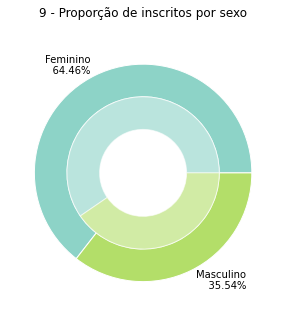

In [15]:
fig = plt.figure(figsize=(10,5))

# Plotagem do gráfico de proporção do sexo
sexo_17 = alunos_menores_17['TP_SEXO'].value_counts(normalize=True).sort_index()
sexo_total = dados['TP_SEXO'].value_counts(normalize=True).sort_index()

chartBar_sexo = plt.subplot()
chartBar_sexo.pie(sexo_17, radius=1,
                  labels= ['Feminino\n    {0:.2f}%'.format(sexo_17['F']*100),
                           'Masculino\n    {0:.2f}%'.format(sexo_17['M']*100)],
                  colors= cmap(np.arange(2)*6), wedgeprops=dict(width=0.3, edgecolor='w'))
chartBar_sexo.pie(sexo_total, radius=0.7, wedgeprops=dict(width=0.3, edgecolor='w', alpha=0.6),
                  colors=cmap(np.arange(2)*6))
chartBar_sexo.set_title('9 - Proporção de inscritos por sexo', pad=20)
chartBar_sexo.set(aspect='equal')
plt.show()

####Raça/cor


Quanto a proporção de alunos de cada cor\raça (gráfico 10), destaca-se:
- A prevalência de alunos brancos, representando quase metade dos inscritos menores de 17 anos.
- Menos de 1% são idígenas, tanto na amostra total quanto na amostra de alunos menores, uma proporção menor do que a de não declarados (em média 2.14%)
- Enquanto a diferença entre as proporções é de menos de 1% para amarelos, não declarados e indígenas, a variação é bem maior entre brancos, pretos e pardos:
  * A proporção de brancos fazendo o exame antes dos 17 anos cresce 38.31% em relação a amostra total dos dados.
  * Enquanto a proporção de pardos e pretos decresce em 16.39% e 48.73%, respectivamente.

A Tabela 1 descreve os valores referenciados.






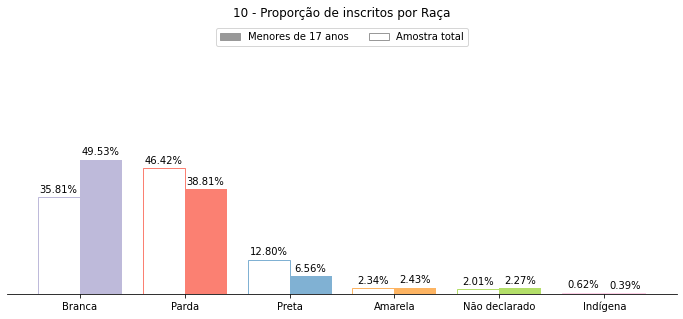



Tabela 1 - Proporção de inscritos por cor/raça para a amostra total da base de dados
		e para a amostra de alunos menores de 17 anos.


,Amostra Total,Menores de 17 anos,Diferença,Variação
Cor/Raça,,,,
Branca,35.81,49.53,13.72,38.31
Parda,46.42,38.81,7.61,-16.39
Preta,12.80,6.56,6.24,-48.73
Amarela,2.34,2.43,0.10,4.21
Não declarado,2.01,2.27,0.26,12.91
Indígena,0.62,0.39,0.23,-37.17


In [16]:
fig = plt.figure(figsize=(12,5))

# Plotagem do gráfico de proporção por raça
raca_17 = alunos_menores_17['TP_COR_RACA'].value_counts(normalize=True).sort_index()
raca_total = dados['TP_COR_RACA'].value_counts(normalize=True).sort_index()
raca_table = pd.DataFrame({'Amostra Total':raca_total,
                     'Menores de 17 anos': raca_17,
                     'Cor/Raça':list(map(raca.get, raca_total.index))})
raca_table = (raca_table.
              set_index('Cor/Raça', drop=True).
              sort_values(by='Menores de 17 anos', ascending=False))

chartBar_raca = plt.subplot()
x = np.arange(raca_table.shape[0])
width=0.4
rects1x=chartBar_raca.bar(x-width/2, raca_table['Amostra Total'], color='w', edgecolor=cmap(x+2), width=width)
chartBar_raca.set_ylim(0,1)
rects1 = chartBar_raca.bar(x+width/2, raca_table['Menores de 17 anos'], color=cmap(x+2), width=width)

chartBar_raca.set_title('10 - Proporção de inscritos por Raça')
format_vertical(chartBar_raca, raca_table.index, x)
annotate_vertical(chartBar_raca, rects1, pad=None)
annotate_vertical(chartBar_raca, rects1x, pad=None)
colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8), facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='upper center', fancybox=True, ncol=2)
plt.show()

print('\n\nTabela 1 - Proporção de inscritos por cor/raça para a amostra total da base de dados\n'+
		 '\t\te para a amostra de alunos menores de 17 anos.')
raca_table['Diferença'] = abs(raca_table['Menores de 17 anos'] - raca_table['Amostra Total'])
raca_table['Variação'] = (raca_table['Menores de 17 anos']/raca_table['Amostra Total'])-1
raca_table = raca_table*100
raca_table = raca_table.round(2)
raca_table

####Rede de ensino

Duas informações foram analisadas sobre as instituições de ensino dos inscritos: a rede de ensino (pública ou privada) e a localidade (urbana ou rural). Estes dados são os que apresentam maior número de insenção de declarações: mais de 70% dos inscritos do enem não responderam estas perguntas no questionário. 

Os dados mostram também que alunos de escolas públicas representam 24.37% dos inscritos do enem (Tabela 2), enquanto alunos da rede privada representam 4.34%. Em relação aos alunos com menos de 17 anos de idade, a proporção de inscritos diminui para 4.92% na rede pública e 1.73% na rede privada, uma queda de 19.75% a mais na rede pública. Já a proporção de não informantes sobe para 93.35% (+30%).

Quanto a localidade dessas instituições, menos de 1% das amostras são de instituições em localidade rural, tanto na amostra total, quanto entre inscritos menores de 17 anos.


In [17]:
esco_17 = alunos_menores_17['TP_ESCOLA'].value_counts(normalize=True)
esco_total = dados['TP_ESCOLA'].value_counts(normalize=True)
esco_table = pd.DataFrame({'Amostra Total':esco_total,
                     'Menores de 17 anos': esco_17,
                     'Rede de ensino':list(map(rede_ensino.get, esco_total.index))})
esco_table = (esco_table.
              set_index('Rede de ensino', drop=True).
              sort_values(by='Menores de 17 anos', ascending=False))
esco_table['Diferença'] = abs(esco_table['Menores de 17 anos'] - esco_table['Amostra Total'])
esco_table['Variação'] = (esco_table['Menores de 17 anos']/esco_table['Amostra Total'])-1
esco_table = esco_table*100
esco_table = esco_table.round(2)

In [18]:
loc_esco_17 = alunos_menores_17['TP_LOCALIZACAO_ESC'].value_counts(normalize=True, dropna=False)
loc_esco_total = dados['TP_LOCALIZACAO_ESC'].value_counts(normalize=True, dropna=False)

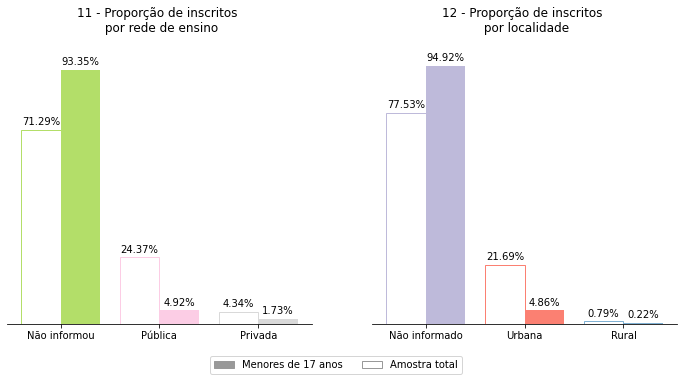



Tabela 2- Proporção de inscritos por rede de ensino para a amostra total
     da base de dados e para a amostra de alunos menores de 17 anos.


,Amostra Total,Menores de 17 anos,Diferença,Variação
Rede de ensino,,,,
Não informou,71.29,93.35,22.06,30.95
Pública,24.37,4.92,19.45,-79.82
Privada,4.34,1.73,2.61,-60.07


In [19]:
fig=plt.figure(figsize=(12,5))
gspec = gridspec.GridSpec(1,2)
#Plotagem da proporção por rede de ensino

chartBar_esc = plt.subplot(gspec[0,0])
x = np.arange(esco_table.shape[0])
width = 0.4
rects2x = chartBar_esc.bar(x-width/2,  esco_table['Amostra Total']/100, 
                           color='w', edgecolor=cmap(x+6), width=width)
rects2 = chartBar_esc.bar(x+width/2,  esco_table['Menores de 17 anos']/100,
                          color=cmap(x+6), width=width)

chartBar_esc.set_title('11 - Proporção de inscritos \n por rede de ensino', pad=20)
chartBar_esc.set_ylim(0,1)

format_vertical(chartBar_esc, esco_table.index, x)
annotate_vertical(chartBar_esc, rects2, pad=None)
annotate_vertical(chartBar_esc, rects2x, pad=None)

#Plotagem da proporção por localização
chartBar_loc_esc = plt.subplot(gspec[0,1])

x = np.arange(len(loc_esco_17))
rects3x = chartBar_loc_esc.bar(x-width/2, loc_esco_total, color='w',
                               edgecolor=cmap(x+2), width=width)
rects3 = chartBar_loc_esc.bar(x+width/2, loc_esco_17.values, width=width,
                              color=cmap(x+2) )
chartBar_loc_esc.set_title('12 - Proporção de inscritos \n por localidade', pad=20)
chartBar_loc_esc.set_ylim(0,1)
labels = [x if x != None else 'Não informado' for x in list(map(localidade.get, loc_esco_17.index)) ]
format_vertical(chartBar_loc_esc, labels , x)
annotate_vertical(chartBar_loc_esc, rects3, None) 
annotate_vertical(chartBar_loc_esc, rects3x, None) 

#Legenda
colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8),
                                   facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='upper center',
           bbox_to_anchor=(-0.12, -0.1), fancybox=True, ncol=2)
plt.show()

#Plotagem da tabela
print('\n\nTabela 2- Proporção de inscritos por rede de ensino para a amostra total\n'+
      '     da base de dados e para a amostra de alunos menores de 17 anos.')
esco_table

###Indicativos Econômicos

####Acesso a transporte privado

O primeiro indicativo econômico avaliado é o acesso à meios de transporte privado, indicado no questionário social pelas viriáveis Q010 - Número de carros na casa, e Q011- Número de motos na casa.

Para fins de avaliação, considerou-se apenas o acesso ou não de qualquer meio de transpote privado pelo aluno. 

In [20]:
transporte_17 = alunos_menores_17[(alunos_menores_17[['Q010', 'Q011']]!='A').any(1)].shape[0]/alunos_menores_17.shape[0]
transporte_total = dados[(dados[['Q010', 'Q011']]!='A').any(1)].shape[0] / dados.shape[0]

In [21]:
table_transporte = pd.DataFrame({'Amostra Total': transporte_total, 
                                 'Menores de 17 anos': transporte_17},
                                 index=['Acesso a transporte particular'])
table_transporte['Diferença'] = abs(table_transporte['Menores de 17 anos'] - table_transporte['Amostra Total'])
table_transporte['Variação'] = (table_transporte['Menores de 17 anos']/table_transporte['Amostra Total'])-1
table_transporte = table_transporte*100
table_transporte = table_transporte.round(2)

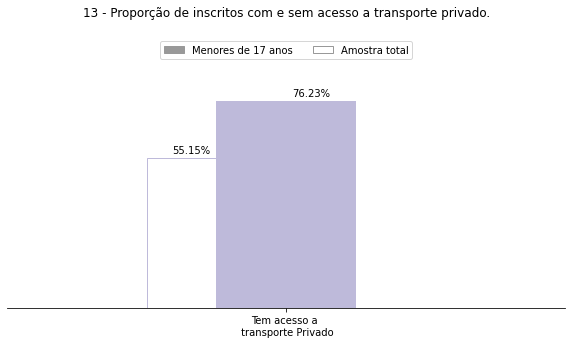



Tabela 3- Proporção de inscritos por meio de transporte para a amostra total
     da base de dados e para a amostra de alunos menores de 17 anos.


,Amostra Total,Menores de 17 anos,Diferença,Variação
Acesso a transporte particular,55.15,76.23,21.09,38.23


In [22]:
# Plotagem do gráfico de proporção transporte
fig = plt.figure(figsize=(10,5))
chartBar_transporte = plt.subplot()

x = np.arange(1)
rects1x = chartBar_transporte.bar(x-0.25, table_transporte['Amostra Total']/100,
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects1 = chartBar_transporte.bar(x,  table_transporte['Menores de 17 anos']/100,
                                 color=cmap(x+2), width=0.5)


chartBar_transporte.set_title('13 - Proporção de inscritos com e sem acesso a transporte privado.', pad=20)
chartBar_transporte.set_ylim(0,1)
chartBar_transporte.set_xlim(-1,1)
format_vertical(chartBar_transporte, ['Tem acesso a \n transporte Privado', 'Apenas transporte Público'], x)
annotate_vertical(chartBar_transporte, rects1, 25)
annotate_vertical(chartBar_transporte, rects1x, -25)

colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8), facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='upper center', fancybox=True, ncol=2)
plt.show()

print('\n\nTabela 3- Proporção de inscritos por meio de transporte para a amostra total\n'+
      '     da base de dados e para a amostra de alunos menores de 17 anos.')
table_transporte

O gráfico e a tabela mostram que a proporção de inscritos com acesso a transpote privado aumenta 38% entre os alunos com idade abaixo de 17 anos, em relação a proporção da amostra total da base de dados. 

####Acesso a tecnologia

Outro critério avaliado foi o acesso a tecnologia. Para essa análise utilizou-se os campos Q019- Q022 e Q024-Q025 do questionário, referentes ao acesso à: Tv, Tv por assinatura, celular, computador e internet.

No questionário as informações são fornecidas com base no número de aparelhos de cada tipo por residência. Para fins de análise, consideramos apenas o acesso ou não a cada aparelho.

In [23]:
tv_17 = alunos_menores_17[~(alunos_menores_17['Q019']=='A')].shape[0]/alunos_menores_17.shape[0]
tv_total = dados[(dados['Q019']!='A')].shape[0]/dados.shape[0]
tv_cabo_17 = alunos_menores_17[(alunos_menores_17['Q021']!='A')].shape[0]/alunos_menores_17.shape[0]
tv_cabo_total = dados[(dados['Q021']!='A')].shape[0]/dados.shape[0]
celular_17 = alunos_menores_17[(alunos_menores_17['Q022']!='A')].shape[0]/alunos_menores_17.shape[0]
celular_total = dados[(dados['Q022']!='A')].shape[0]/dados.shape[0]
pc_17 = alunos_menores_17[(alunos_menores_17['Q024']!='A')].shape[0]/alunos_menores_17.shape[0]
pc_total = dados[(dados['Q024']!='A')].shape[0]/dados.shape[0]
net_17 = alunos_menores_17[(alunos_menores_17['Q025']!='A')].shape[0]/alunos_menores_17.shape[0]
net_total = dados[(dados['Q025']!='A')].shape[0]/dados.shape[0]
pelo_menos_um_17 = (alunos_menores_17[(alunos_menores_17[['Q019','Q021', 'Q022', 'Q024', 'Q025']]!='A').any(1)].shape[0]/
                    alunos_menores_17.shape[0])
pelo_menos_um_total = (dados[(dados[['Q019','Q021', 'Q022', 'Q024', 'Q025']]!='A').any(1)].shape[0]/
                    dados.shape[0])

In [24]:
table_tech = pd.DataFrame({'TV': [tv_17, tv_total], 
                           'TV a cabo': [tv_cabo_17,tv_cabo_total],
                          'Celular': [celular_17, celular_total],
                           'Computador': [pc_17, pc_total],
                           'Internet':[net_17, net_total], 
                           'Pelo menos um':[pelo_menos_um_17, pelo_menos_um_total]}).T
table_tech.columns = ['Amostra Total', 'Menores de 17 anos']
table_tech['Diferença'] = abs(table_tech['Menores de 17 anos'] - table_tech['Amostra Total'])
table_tech['Variação'] = (table_tech['Menores de 17 anos']/table_tech['Amostra Total'])-1
table_tech = table_tech*100
table_tech = table_tech.round(2)

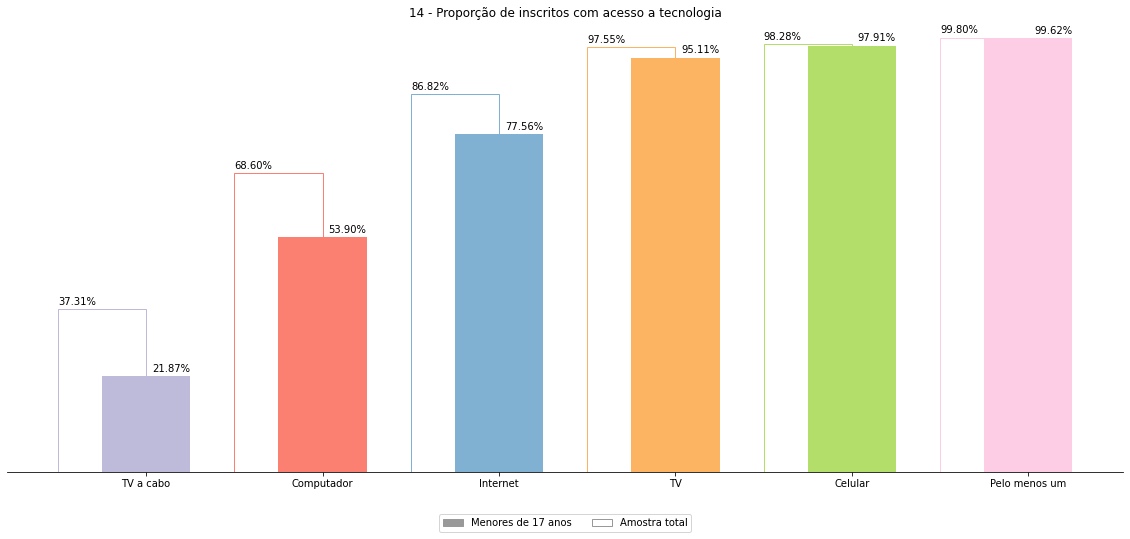



Tabela 4- Proporção de inscritos com acesso a tecnologia para a amostra total
     da base de dados e para a amostra de alunos menores de 17 anos.


,Amostra Total,Menores de 17 anos,Diferença,Variação
TV,97.55,95.11,2.43,-2.49
TV a cabo,37.31,21.87,15.44,-41.39
Celular,98.28,97.91,0.36,-0.37
Computador,68.60,53.90,14.70,-21.43
Internet,86.82,77.56,9.26,-10.67
Pelo menos um,99.80,99.62,0.18,-0.18


In [25]:
fig = plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace=1)

#Plotagem da proporção por acesso a TV
chartBar_tech = plt.subplot()
x = np.arange(table_tech.shape[0])
width = 0.5
rects2x = chartBar_tech.bar(x-width/2, table_tech.sort_values(by='Menores de 17 anos')['Amostra Total']/100,
                        color='w', edgecolor=cmap(x+2), width=width)
rects2 = chartBar_tech.bar(x, table_tech.sort_values(by='Menores de 17 anos')['Menores de 17 anos']/100,
                        color=cmap(x+2), width=width)

chartBar_tech.set_title('14 - Proporção de inscritos com acesso a tecnologia', pad=20)
chartBar_tech.set_ylim(0,1)
format_vertical(chartBar_tech, table_tech.sort_values(by='Menores de 17 anos').index, x)
annotate_vertical(chartBar_tech, rects2, 25)
annotate_vertical(chartBar_tech, rects2x, -25)

colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8), facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='lower center', bbox_to_anchor=(0.5, -0.15),  fancybox=True, ncol=2)
plt.show()

print('\n\nTabela 4- Proporção de inscritos com acesso a tecnologia para a amostra total\n'+
      '     da base de dados e para a amostra de alunos menores de 17 anos.')
table_tech

O acesso a cada tecnologia pode ser hankeado por proporção de alunos: 
* Tv a cabo 
* Computador 
* Internet 
* TV
* Celular

A ordem é a mesma tanto para a amostra total quanto para a amostra de menores de 17 anos, variando apenas as proporções. 


Algumas observações podem ser feitas: 
* Tv a cabo é a tecnologia menos acessada e presenta a maior variação: uma queda 41% na proporção quando os inscritos são menores de 17 anos. 
* TV e celular são as tecnologias mais acessíveis, mais de 95% dos inscritos de quaisquer das amostras tem acesso a elas.
* Diferente das demais variáveis analisadas, as proporções são menores quando os alunos são menores de 17 anos. 
* A princípio, imagináva-se que o acesso a TV teria o maior índice, mas na verdade, o acesso a celular é mais frequente. 
* Quase a totalidade dos inscritos tem acesso a pelo menos uma tecnologia (+99%). 





####Renda Familiar

Quanto a renda familiar observa-se que a distribuição entre as amostras é similar, com assimetria positiva e uma concentração das amostras entre ]0, 2.5] salários mínimos.  

In [26]:
renda_17 = alunos_menores_17['Q006'].sort_values()
renda_total = dados['Q006'].sort_values()

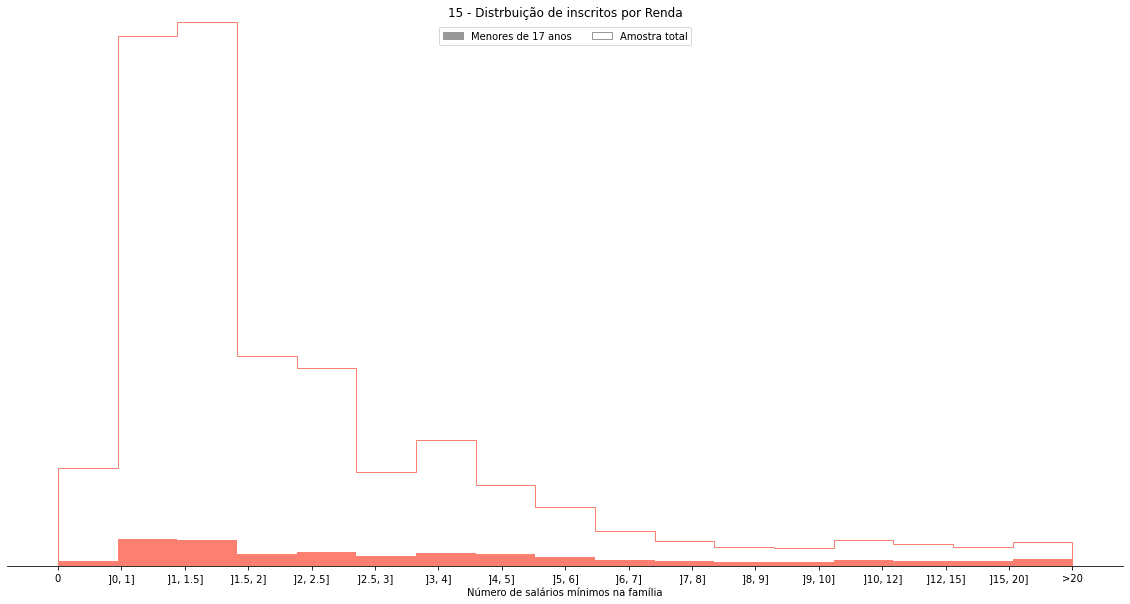

In [27]:

# Plotagem do histograma de renda
plt.figure(figsize=(20,10))
hist_renda = plt.subplot()

hist_renda.hist(renda_17, bins=17, align='mid', color=cmap(3), label='Menores de 17 anos')
hist_renda.hist(renda_total, bins=17, align='mid',
                histtype='step', color=cmap(3), label='Amostra total')
hist_renda.set_title('15 - Distrbuição de inscritos por Renda')

x = np.arange(len(renda_17.value_counts().index))
labels = renda_17.value_counts().sort_index().index
format_vertical(hist_renda, list(map(renda.get, labels)), x)
hist_renda.set_ylim(0, renda_total.value_counts().max())
hist_renda.set_xlabel('Número de salários mínimos na família')

colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8), facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='upper center', fancybox=True, ncol=2)
plt.show()

#Avaliação do desempenho dos inscritos

Após verificar as variáveis geográficas e socioeconômicas, analisaremos  impacto dessas variáveis no desempenho dos inscritos.

É importante notar que 12.47% dos inscritos menores de 17 não compareceram a pelo menos uma prova, representando 3.58% do número total de alunos faltantes. Bem como, 6.45% dos inscritos menores de 17 não compareceram a nenhum dia de prova, representando 2.22% do número total de alunos desistentes. Para evitar distorções nas avaliações, as informações desses inscritos serão descartadas.


In [28]:
presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']
provas =  ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
alunos_presentes = dados[~(dados[presenca]==0).any(axis=1)].copy()
alunos_presentes['Menor de 17']  = alunos_presentes.apply(lambda x: x['NU_IDADE']<17, axis=1)
alunos_presentes['Desempenho médio'] = alunos_presentes[provas].sum(axis=1)/5

##Raça

In [29]:
nao_declarados = alunos_presentes[alunos_presentes['TP_COR_RACA']==0].index
order = alunos_presentes.drop(nao_declarados).groupby('TP_COR_RACA').median()['Desempenho médio'].sort_values().index


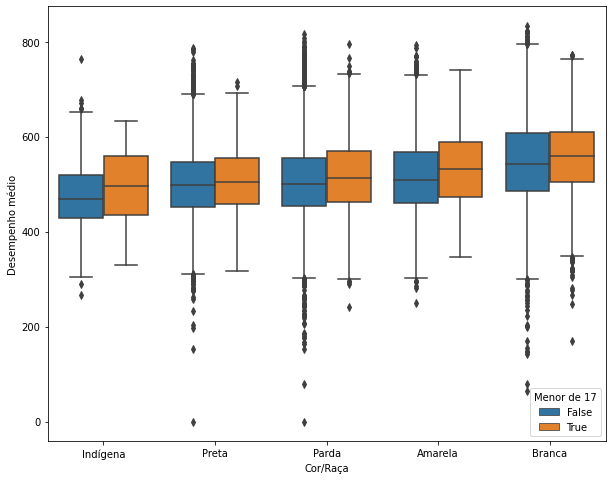

In [30]:
fig = plt.figure(figsize=(10,8))
box_desempenho_raca = plt.subplot()
sns.boxplot(ax = box_desempenho_raca,  x="TP_COR_RACA", y="Desempenho médio",
            data=alunos_presentes.drop(nao_declarados), hue = "Menor de 17", 
            order = order)
box_desempenho_raca.set_xticklabels(list(map(raca.get, order)))
box_desempenho_raca.set_xlabel('Cor/Raça')
plt.show()

## Rede de ensino

In [31]:
nao_declarados_rede = alunos_presentes[alunos_presentes['TP_ESCOLA']==1].index
order_rede = alunos_presentes.drop(nao_declarados_rede).groupby('TP_ESCOLA').median()['Desempenho médio'].sort_values().index

order_loc = alunos_presentes.groupby('TP_LOCALIZACAO_ESC').median()['Desempenho médio'].sort_values().index

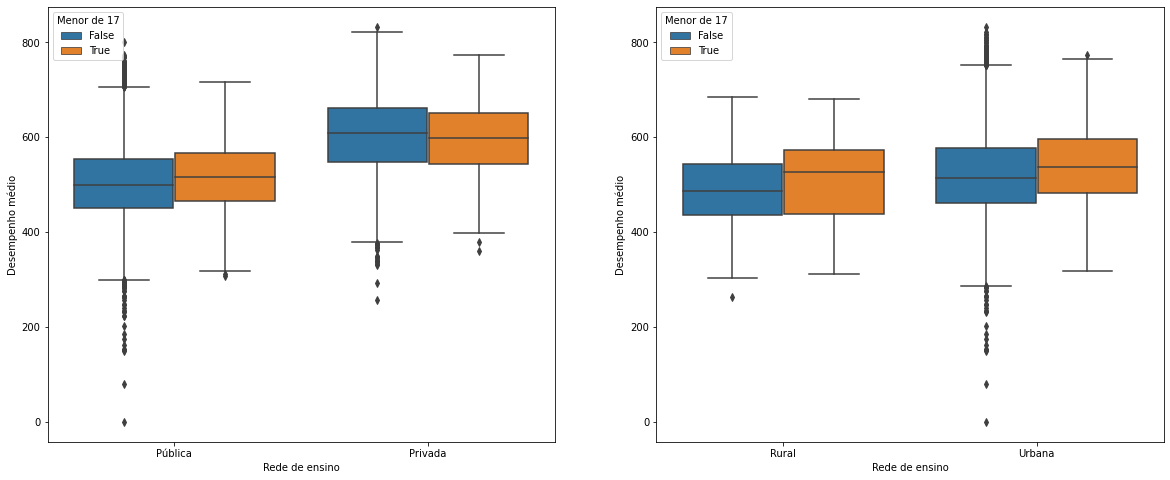

In [32]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(1,2)

box_desempenho_rede = plt.subplot(gspec[0,0])
sns.boxplot(ax = box_desempenho_rede,  x="TP_ESCOLA", y="Desempenho médio",
            data=alunos_presentes.drop(nao_declarados_rede), hue = "Menor de 17", 
            order = order_rede)
box_desempenho_rede.set_xticklabels(list(map(rede_ensino.get, order_rede)))
box_desempenho_rede.set_xlabel('Rede de ensino')

box_desempenho_loc = plt.subplot(gspec[0,1])
sns.boxplot(ax = box_desempenho_loc,  x="TP_LOCALIZACAO_ESC", y="Desempenho médio",
            data=alunos_presentes, hue = "Menor de 17", 
            order = order_loc)
box_desempenho_loc.set_xticklabels(list(map(localidade.get, order_loc)))
box_desempenho_loc.set_xlabel('Localidade da instituição')

plt.show()

## Acesso a transporte privado

In [33]:
alunos_presentes['Transporte Privado'] = (alunos_presentes[['Q010', 'Q011']]!='A').any(1)

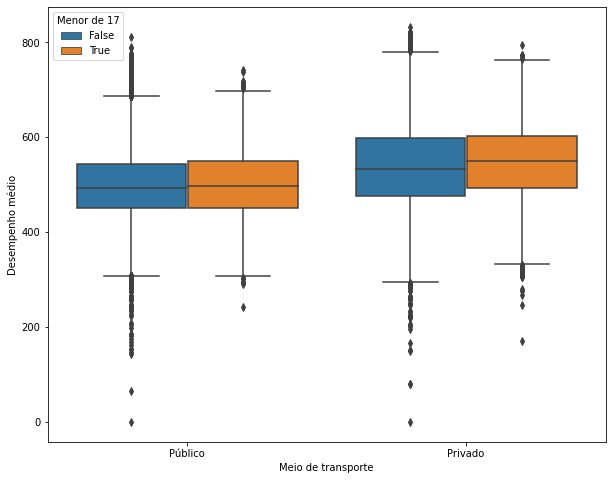

In [34]:
fig = plt.figure(figsize=(10,8))
box_desempenho_raca = plt.subplot()
sns.boxplot(ax = box_desempenho_raca,  x="Transporte Privado", y="Desempenho médio",
            data=alunos_presentes, hue = "Menor de 17")
box_desempenho_raca.set_xticklabels(['Público', 'Privado'])
box_desempenho_raca.set_xlabel('Meio de transporte')
plt.show()

In [ ]:

def polt_subplot(axes, column, title, dict_map):
  order = alunos_presentes[column].value_counts().sort_index().index
  box_desempenho = plt.subplot(axes)
  sns.boxplot(ax = box_desempenho,  x=column, y="Desempenho médio",
              data=alunos_presentes, hue = "Menor de 17",
              order=order)
  box_desempenho.set_xlabel(title)
  box_desempenho.set_xticklabels(list(map(dict_map.get, order)))



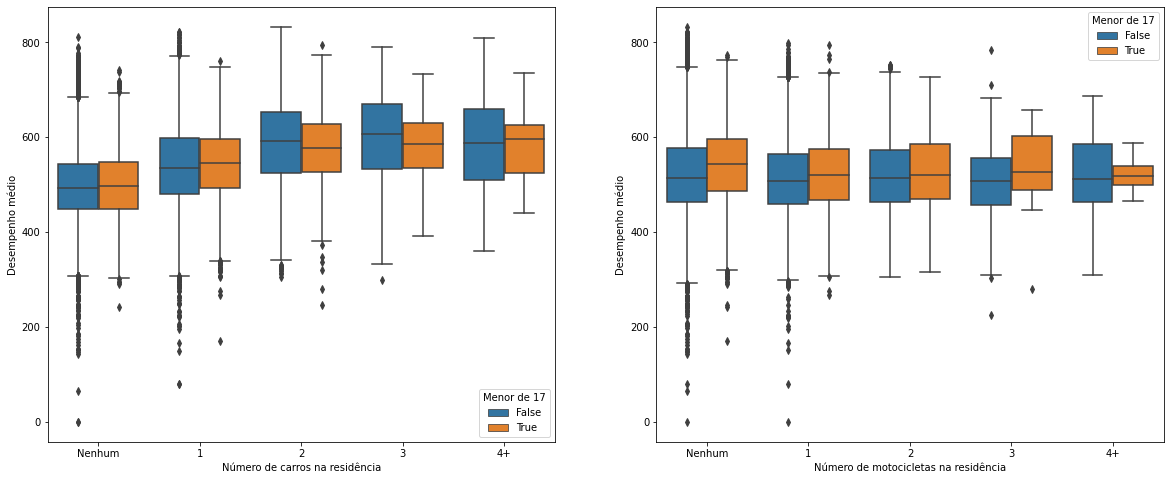

In [46]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(1,2)

polt_subplot(gspec[0,0], "Q010", 'Número de carros na residência', map_qtd)
polt_subplot(gspec[0,1], "Q011", 'Número de motocicletas na residência', map_qtd)

plt.show()

##Acesso a tecnologia

In [48]:
alunos_presentes['Acesso a tecnologia'] = (alunos_presentes[['Q019','Q021', 'Q022', 'Q024', 'Q025']]!='A').any(1)

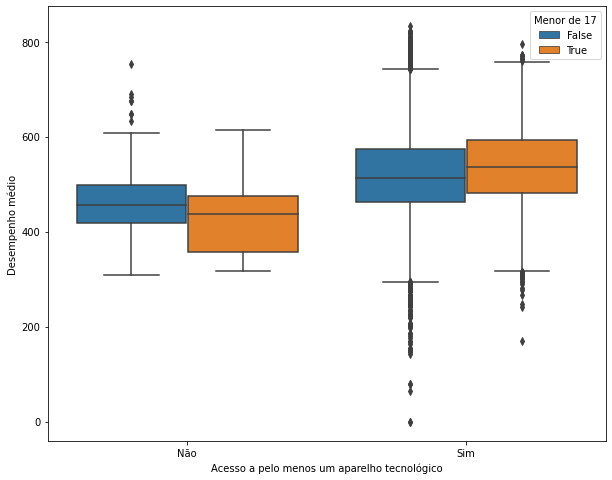

In [51]:
fig = plt.figure(figsize=(10,8))
box_desempenho_raca = plt.subplot()
sns.boxplot(ax = box_desempenho_raca,  x="Acesso a tecnologia", y="Desempenho médio",
            data=alunos_presentes, hue = "Menor de 17")
box_desempenho_raca.set_xticklabels(['Não', 'Sim'])
box_desempenho_raca.set_xlabel('Acesso a pelo menos um aparelho tecnológico')
plt.show()

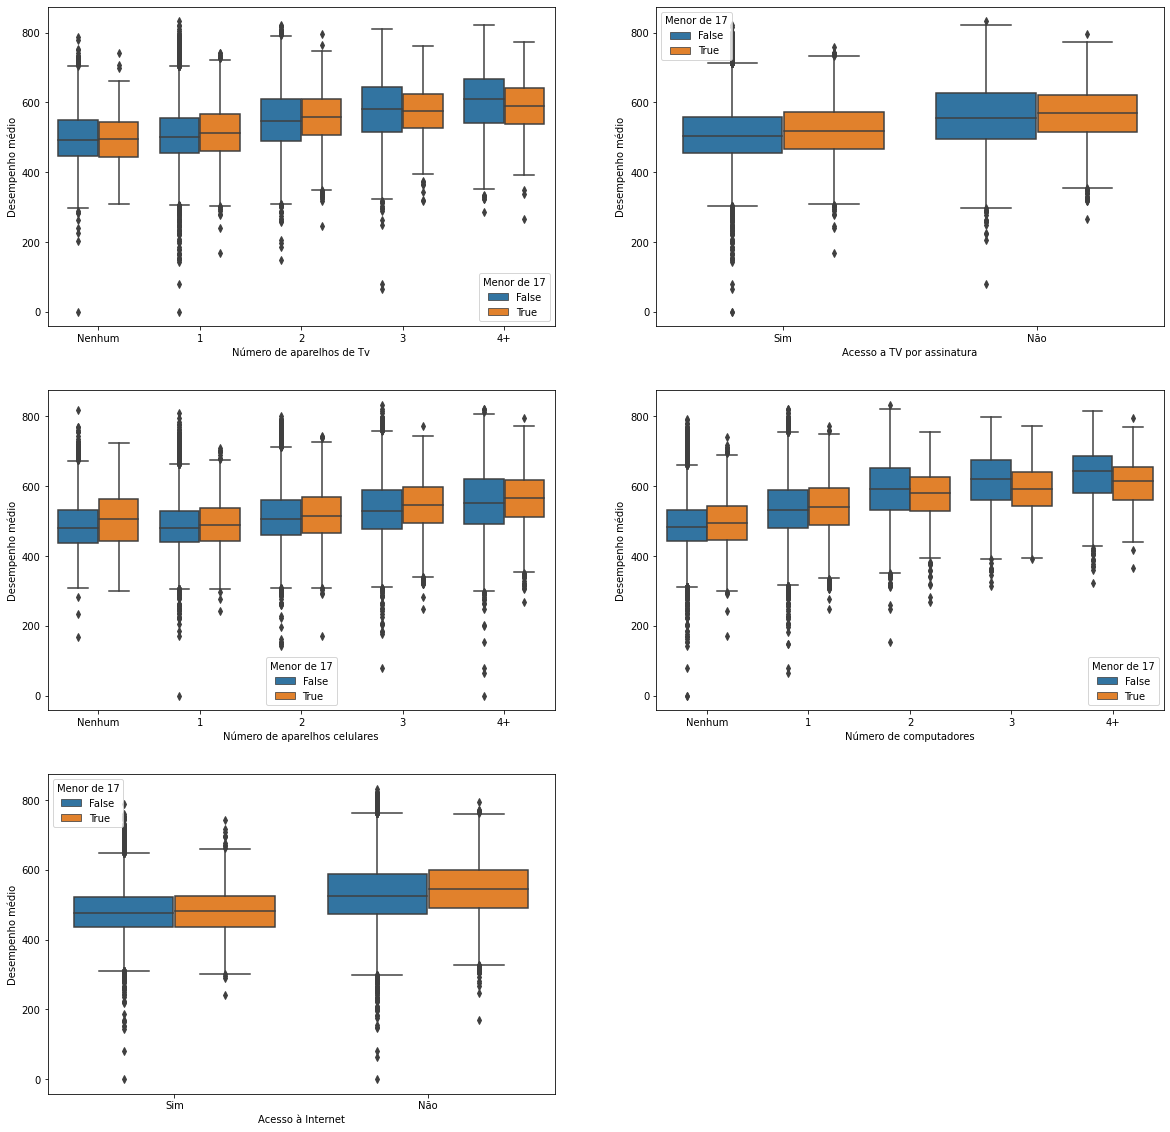

In [45]:
fig = plt.figure(figsize=(20,20))
gspec = gridspec.GridSpec(3,2)

polt_subplot(gspec[0,0], "Q019", 'Número de aparelhos de Tv', map_qtd)
polt_subplot(gspec[0,1], "Q021", 'Acesso a TV por assinatura', map_boolean)
polt_subplot(gspec[1,0], "Q022", 'Número de aparelhos celulares', map_qtd)
polt_subplot(gspec[1,1], "Q024", 'Número de computadores', map_qtd)
polt_subplot(gspec[2,0], "Q025", 'Acesso à Internet', map_boolean)

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))
desempenho_medio_menores_17 = alunos_menores_17[provas].sum(axis=1)/5
desempenho_medio_menores_17 = desempenho_medio_menores_17.where(desempenho_medio_menores_17>0.0).dropna()
desempenho_medio_total = dados[provas].sum(axis=1)/5
desempenho_medio_total = desempenho_medio_total.where(desempenho_medio_total>0.0).dropna()

hist_desempenho = plt.subplot()
hist_desempenho.hist(desempenho_medio_menores_17, bins=50, alpha=0.5)
hist_desempenho.axvline(x=desempenho_medio_total.mean(), ymax=500, color='green', label='Média Nacional')
hist_desempenho.axvline(x=desempenho_medio_menores_17.mean(), ymax=500, color='orange', label='Média de alunos menores de 17 anos')
hist_desempenho.annotate('{0:.2f}'.format(desempenho_medio_menores_17.mean()), xy=(desempenho_medio_menores_17.mean(), 500),
                         xytext=(5, 40),textcoords="offset points", color='orange')
hist_desempenho.annotate('{0:.2f}'.format(desempenho_medio_total.mean()), xy=(desempenho_medio_total.mean(), 500),
                         xytext=(-40, 40),textcoords="offset points", color='green')

hist_desempenho.legend()
hist_desempenho.spines['right'].set_visible(False)
hist_desempenho.spines['top'].set_visible(False)
hist_desempenho.spines['left'].set_visible(False)
hist_desempenho.get_yaxis().set_visible(False)
hist_desempenho.set_xlabel('Nota Média')
hist_desempenho.set_title('15 - Distribuição do desempenho médio de alunos menores de 17 anos', pad=20)

# Análises textuais

print('{0:.2f}% dos inscritos menores de 17 não compareceram a pelo menos uma prova, representando {1:.2f}% do número total de alunos faltantes.'
.format(alunos_menores_17_faltantes.shape[0]/alunos_menores_17.shape[0]*100, 
        alunos_menores_17_faltantes.shape[0]/alunos_faltantes.shape[0]*100))

print('{0:.2f}% dos inscritos menores de 17 não compareceram a nenhum dia de prova, representando {1:.2f}% do número total de alunos desistentes.'
.format(alunos_menores_17_desistentes.shape[0]/alunos_menores_17.shape[0]*100,
        alunos_menores_17_desistentes.shape[0]/alunos_desistentes.shape[0]*100))
menores_17_treineiros = alunos_menores_17[alunos_menores_17['IN_TREINEIRO']==1]
print('{0:.2f}% dos inscritos menores de 17 anos são treineiros.'.format(menores_17_treineiros.shape[0]/alunos_menores_17.shape[0]*100))

menores_17_melhores_media = desempenho_medio_menores_17.where(desempenho_medio_menores_17 > desempenho_medio_total.mean()).dropna()
print('{0:.2f}% dos inscritos menores de 17 anos tiram notas maiores que a média nacional.'.format(len(menores_17_melhores_media)/alunos_menores_17.shape[0] *100 ))


#Dashboards

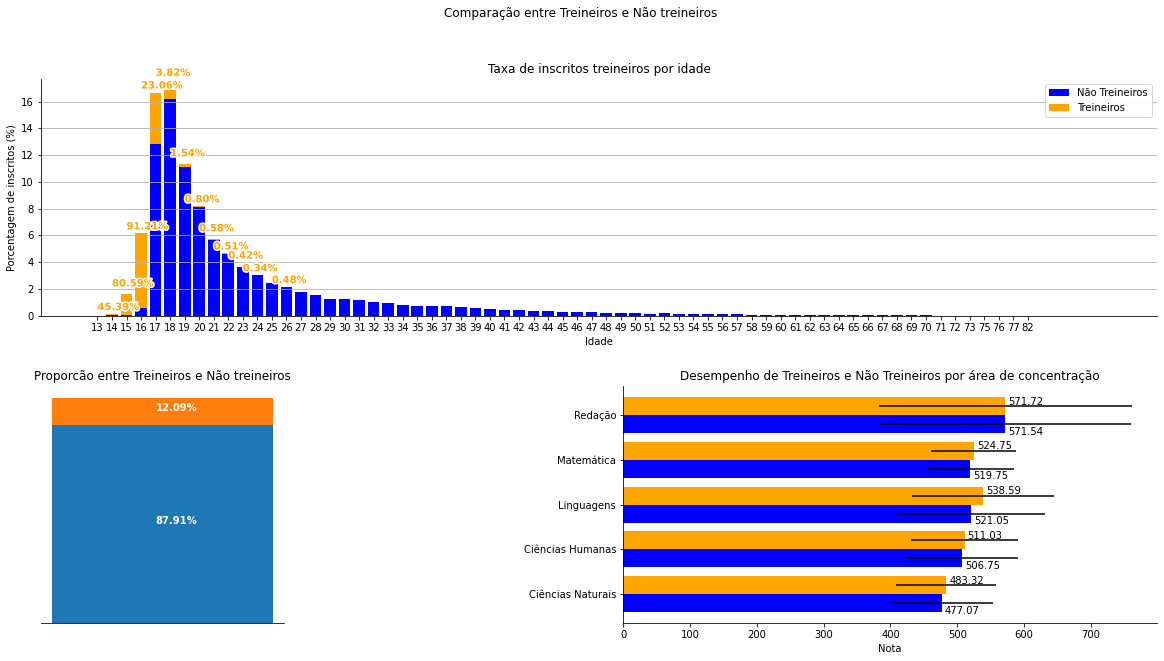

In [52]:
dados['IN_TREINEIRO']
treineiros = dados.loc[dados[dados['IN_TREINEIRO']==1].index].index
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparação entre Treineiros e Não treineiros')
gspec = gridspec.GridSpec(2,4)
plt.subplots_adjust(hspace=0.3)

#Plotagem da proporção de inscritos treineiros por idade
top_histogram = plt.subplot(gspec[0,0:])
idade_treineiros = dados.loc[treineiros]['NU_IDADE'].value_counts().sort_index()
idade_nao_treineiros = (dados.
                        drop(index=treineiros)['NU_IDADE'].
                        value_counts().
                        sort_index())
proporcao_nao_treineiros = (idade_nao_treineiros / dados.shape[0] )*100
proporcao_treineiros = (idade_treineiros / dados.shape[0])*100
repetido = proporcao_treineiros.index.intersection(proporcao_nao_treineiros.index)

top_histogram.bar(proporcao_nao_treineiros.loc[repetido].index, 
                  proporcao_nao_treineiros.loc[repetido].values, 
                  label='Não Treineiros', color='b')
top_histogram.bar(proporcao_nao_treineiros.drop(index=repetido).index, 
                  proporcao_nao_treineiros.drop(index=repetido).values,
                  color='b')
top_histogram.bar(proporcao_treineiros.loc[repetido].index, 
                  proporcao_treineiros.loc[repetido].values, 
                  bottom = proporcao_nao_treineiros.loc[repetido].values, 
                  label='Treineiros', color='orange')
top_histogram.bar(proporcao_treineiros.drop(index=repetido).index,
                  proporcao_treineiros.drop(index=repetido).values,
                  color='orange')
for i in repetido:
  if proporcao_treineiros.loc[i]>0.01:
    height = proporcao_treineiros.loc[i] + proporcao_nao_treineiros.loc[i]
    if i in [15,19,21,23]: height += 0.3
    elif i == 18 : height += 0.8
    pct = (proporcao_treineiros.loc[i]/ height) * 100
    text = (top_histogram
            .text(i-1,height+0.3,
                  '{0:0.2f}%'.format(pct), 
                  color='orange', fontweight = 'bold' )
            .set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')]))

proporcao = dados['NU_IDADE'].value_counts(normalize=True).sort_index()
x=range(proporcao.index.min(),proporcao.index.min()+ len(proporcao))
top_histogram.set_xticks(x)
top_histogram.set_xticklabels(proporcao.index)
top_histogram.set_ylabel('Porcentagem de inscritos (%)')
top_histogram.set_xlabel('Idade')
top_histogram.spines['right'].set_visible(False)
top_histogram.spines['top'].set_visible(False)
top_histogram.grid(axis='y')
top_histogram.legend()
top_histogram.set_title('Taxa de inscritos treineiros por idade')

# Plotagem do gráfico de comparação entre o total de treineiros e não treineiros
sideChatL = plt.subplot(gspec[1,0])
sideChatL.bar(0, dados.drop(index=treineiros).shape[0], )
sideChatL.bar(0, len(treineiros), 
              bottom=dados.drop(index=treineiros).shape[0])

sideChatL.text(-0.025, dados.drop(index=treineiros).shape[0]/2, 
               '{0:.2f}%'.format(dados.drop(index=treineiros).shape[0]/dados.shape[0]*100),
               fontweight = 'bold', color='w' )
sideChatL.text(-0.025, dados.drop(index=treineiros).shape[0] + len(treineiros)/2,
               '{0:.2f}%'.format(len(treineiros)/dados.shape[0]*100), 
               fontweight = 'bold', color='w' )

sideChatL.set_title('Proporcão entre Treineiros e Não treineiros')
sideChatL.spines['right'].set_visible(False)
sideChatL.spines['top'].set_visible(False)
sideChatL.spines['left'].set_visible(False)
sideChatL.get_yaxis().set_visible(False)
sideChatL.get_xaxis().set_visible(False)


#Plotagem do gráfio de comparação do desempenhos de treineiros e não treineiros por área
provas =  ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
desempenho_media = (dados
              .groupby("IN_TREINEIRO")
              .agg("mean")[provas])
desempenho_std = (dados
              .groupby("IN_TREINEIRO")
              .agg("std")[provas])
sideChartH = plt.subplot(gspec[1,2:])
labels = ['Ciências Naturais', 'Ciências Humanas', 'Linguagens', 'Matemática', 'Redação']
y = np.arange(len(labels))
lenght = 0.40

rects1 = sideChartH.barh(y-lenght/2, desempenho_media.loc[0], lenght, 
                         label='Não treineiros', color = 'b', 
                         xerr=desempenho_std.loc[0])
rects2 = sideChartH.barh(y+lenght/2, desempenho_media.loc[1], lenght, 
                         label='Treineiros', color='orange',
                         xerr=desempenho_std.loc[1])

def label(rects, ypos='center'):
  offset = {'center': 0, 'top': 2, 'bottom': -2}

  for rect in rects:
    width = rect.get_width()
    sideChartH.annotate('{0:.2f}'.format(width),
                        xy=(width, rect.get_y()+0.1),
                        xytext=(3, offset[ypos]*3),
                        textcoords="offset points")
label(rects1, 'bottom')
label(rects2, 'top')

sideChartH.set_title('Desempenho de Treineiros e Não Treineiros por área de concentração')
sideChartH.spines['right'].set_visible(False)
sideChartH.spines['top'].set_visible(False)
sideChartH.set_yticks(y)
sideChartH.set_yticklabels(labels)
sideChartH.set_xlabel('Nota')

plt.show()


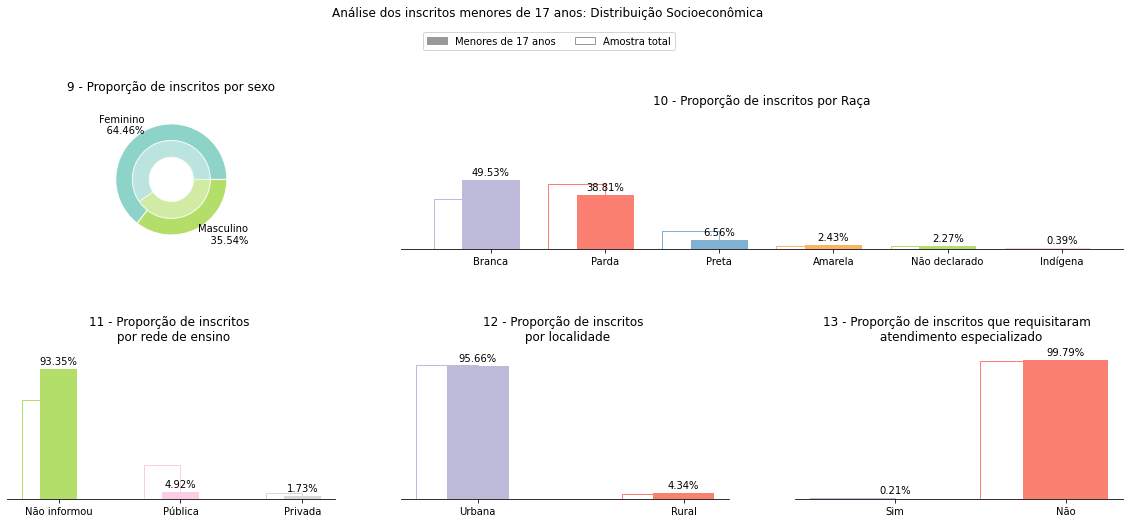

In [53]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(2,3)
plt.subplots_adjust(hspace=0.8, top=0.8)
fig.suptitle('Análise dos inscritos menores de 17 anos: Distribuição Socioeconômica')

# Plotagem do gráfico de proporção do sexo
sexo_17 = alunos_menores_17['TP_SEXO'].value_counts(normalize=True).sort_index()
sexo_total = dados['TP_SEXO'].value_counts(normalize=True).sort_index()

chartBar_sexo = plt.subplot(gspec[0,0])
chartBar_sexo.pie(sexo_17, radius=1,
                  labels= ['Feminino\n    {0:.2f}%'.format(sexo_17['F']*100),
                           'Masculino\n    {0:.2f}%'.format(sexo_17['M']*100)],
                  colors= cmap(np.arange(2)*6), wedgeprops=dict(width=0.3, edgecolor='w'))
chartBar_sexo.pie(sexo_total, radius=0.7, wedgeprops=dict(width=0.3, edgecolor='w', alpha=0.6),
                  colors=cmap(np.arange(2)*6))
chartBar_sexo.set_title('9 - Proporção de inscritos por sexo', pad=20)
chartBar_sexo.set(aspect='equal')

# Plotagem do gráfico de proporção por raça
raca_17 = alunos_menores_17['TP_COR_RACA'].value_counts(normalize=True).sort_index()
raca_total = dados['TP_COR_RACA'].value_counts(normalize=True).sort_index()
raca_table = pd.DataFrame({'Amostra Total':raca_total,
                     'Menores de 17 anos': raca_17,
                     'Cor/Raça':list(map(raca.get, raca_total.index))})
raca_table = (raca_table.
              set_index('Cor/Raça', drop=True).
              sort_values(by='Menores de 17 anos', ascending=False))

chartBar_raca = plt.subplot(gspec[0,1:])
x = np.arange(raca_table.shape[0])
chartBar_raca.bar(x-0.25, raca_table['Amostra Total'], color='w', edgecolor=cmap(x+2), width=0.5)
chartBar_raca.set_ylim(0,1)
rects1 = chartBar_raca.bar(x, raca_table['Menores de 17 anos'], color=cmap(x+2), width=0.5)

chartBar_raca.set_title('10 - Proporção de inscritos por Raça')
format_vertical(chartBar_raca, raca_table.index, x)
annotate_vertical(chartBar_raca, rects1, None)

#Plotagem da proporção por rede de ensino
esco_17 = alunos_menores_17['TP_ESCOLA'].value_counts(normalize=True)
esco_total = dados['TP_ESCOLA'].value_counts(normalize=True)
esco_table = pd.DataFrame({'Amostra Total':esco_total,
                     'Menores de 17 anos': esco_17,
                     'Rede de ensino':list(map(rede_ensino.get, esco_total.index))})
esco_table = (esco_table.
              set_index('Rede de ensino', drop=True).
              sort_values(by='Menores de 17 anos', ascending=False))

chartBar_esc = plt.subplot(gspec[1,0])
x = np.arange(esco_table.shape[0])
chartBar_esc.bar(x-0.15,  esco_table['Amostra Total'], color='w', edgecolor=cmap(x+6), width=0.3)
rects2 = chartBar_esc.bar(x,  esco_table['Menores de 17 anos'], width=0.3,color=cmap(x+6))

chartBar_esc.set_title('11 - Proporção de inscritos \n por rede de ensino', pad=20)
chartBar_esc.set_ylim(0,1)


format_vertical(chartBar_esc, esco_table.index, x)
annotate_vertical(chartBar_esc, rects2, None)

#Plotagem da proporção por localização
loc_esco_17 = alunos_menores_17['TP_LOCALIZACAO_ESC'].value_counts(normalize=True)
loc_esco_total = dados['TP_LOCALIZACAO_ESC'].value_counts(normalize=True)

chartBar_loc_esc = plt.subplot(gspec[1,1])
x = np.arange(len(loc_esco_17))
chartBar_loc_esc.bar(x-0.15, loc_esco_total, color='w', edgecolor=cmap(x+2), width=0.3)
rects3 = chartBar_loc_esc.bar(x, loc_esco_17.values, width=0.3, color=cmap(x+2) )

chartBar_loc_esc.set_title('12 - Proporção de inscritos \n por localidade', pad=20)
chartBar_loc_esc.set_ylim(0,1)
labels = {1:'Urbana', 2:'Rural'}
format_vertical(chartBar_loc_esc, list(map(labels.get, loc_esco_17.index)), x)
annotate_vertical(chartBar_loc_esc, rects3, None)

#Plotagem da proporção por necessidades especiais
aten_esp_17 = alunos_menores_17[(alunos_menores_17[atendimento_esp]==1).any(1)]
aten_esp_total =dados[(dados[atendimento_esp]==1).any(1)]

chartBar_aten_esp = plt.subplot(gspec[1,2])
x = np.arange(2)
chartBar_aten_esp.bar(x-0.25, [aten_esp_total.shape[0]/ dados.shape[0],
                         (dados.shape[0]-aten_esp_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects2 = chartBar_aten_esp.bar(x, [aten_esp_17.shape[0]/ alunos_menores_17.shape[0],
                            (alunos_menores_17.shape[0]-aten_esp_17.shape[0])/ alunos_menores_17.shape[0]],
                        color=cmap(x+2), width=0.5)

chartBar_aten_esp.set_title('13 - Proporção de inscritos que requisitaram \n atendimento especializado', pad=20)
chartBar_aten_esp.set_ylim(0,1)
format_vertical(chartBar_aten_esp, ['Sim', 'Não'], x)
annotate_vertical(chartBar_aten_esp, rects2, None)

colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8), facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='upper center', bbox_to_anchor=(-0.75, 3.4), fancybox=True, ncol=2)
plt.show()


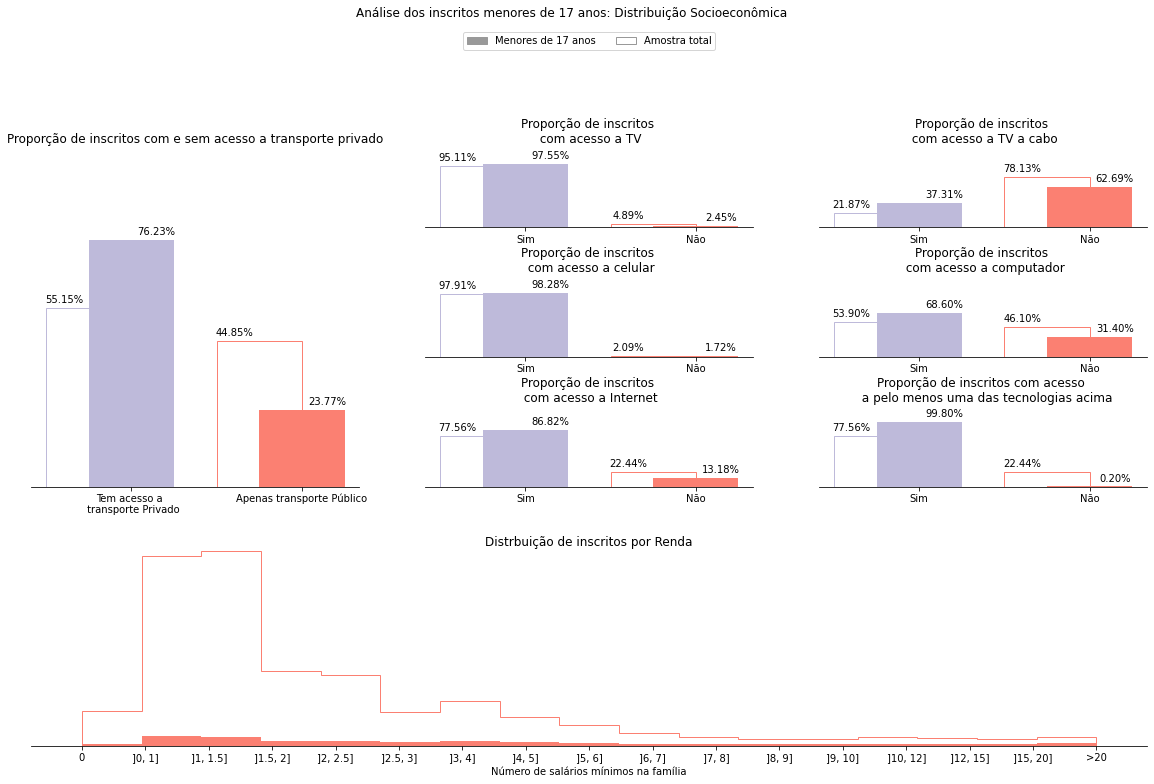

In [54]:
fig = plt.figure(figsize=(20,12))
gspec = gridspec.GridSpec(5,3)
plt.subplots_adjust(hspace=1, top=0.8)
fig.suptitle('Análise dos inscritos menores de 17 anos: Distribuição Socioeconômica')

# Plotagem do gráfico de proporção transporte
transporte_17 = alunos_menores_17[(alunos_menores_17[['Q010', 'Q011']]!='A').any(1)]
transporte_total = dados[(dados[['Q010', 'Q011']]!='A').any(1)]

chartBar_transporte = plt.subplot(gspec[0:3,0])
x = np.arange(2)
rects1x = chartBar_transporte.bar(x-0.25, [transporte_total.shape[0]/ dados.shape[0],
                                 (dados.shape[0]-transporte_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
chartBar_transporte.set_ylim(0,1)
rects1 = chartBar_transporte.bar(x, [transporte_17.shape[0]/alunos_menores_17.shape[0],
                                 (alunos_menores_17.shape[0]-transporte_17.shape[0])/alunos_menores_17.shape[0]],
                                 color=cmap(x+2), width=0.5)

chartBar_transporte.set_title('Proporção de inscritos com e sem acesso a transporte privado', pad=20)
format_vertical(chartBar_transporte, ['Tem acesso a \n transporte Privado', 'Apenas transporte Público'], x)
annotate_vertical(chartBar_transporte, rects1, 25)
annotate_vertical(chartBar_transporte, rects1x, -25)


#Plotagem da proporção por acesso a TV
tv_17 = alunos_menores_17[(alunos_menores_17['Q019']!='A')]
tv_total = dados[(dados['Q019']!='A')]

chartBar_tv = plt.subplot(gspec[0,1])
x = np.arange(2)
rects2x = chartBar_tv.bar(x-0.25, [tv_total.shape[0]/ dados.shape[0],
                         (dados.shape[0]-tv_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects2 = chartBar_tv.bar(x, [tv_17.shape[0]/ alunos_menores_17.shape[0],
                            (alunos_menores_17.shape[0]-tv_17.shape[0])/ alunos_menores_17.shape[0]],
                        color=cmap(x+2), width=0.5)

chartBar_tv.set_title('Proporção de inscritos \n com acesso a TV', pad=20)
chartBar_tv.set_ylim(0,1)
format_vertical(chartBar_tv, ['Sim', 'Não'], x)
annotate_vertical(chartBar_tv, rects2, 25)
annotate_vertical(chartBar_tv, rects2x, -25)

#Plotagem da proporção por acesso a TV a cabo
tv_cabo_17 = alunos_menores_17[(alunos_menores_17['Q021']!='A')]
tv_cabo_total = dados[(dados['Q021']!='A')]

chartBar_tv_cabo = plt.subplot(gspec[0,2])
x = np.arange(2)
rects2x = chartBar_tv_cabo.bar(x-0.25, [tv_cabo_total.shape[0]/ dados.shape[0],
                         (dados.shape[0]-tv_cabo_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects2 = chartBar_tv_cabo.bar(x, [tv_cabo_17.shape[0]/ alunos_menores_17.shape[0],
                            (alunos_menores_17.shape[0]-tv_cabo_17.shape[0])/ alunos_menores_17.shape[0]],
                        color=cmap(x+2), width=0.5)

chartBar_tv_cabo.set_title('Proporção de inscritos \n com acesso a TV a cabo', pad=20)
chartBar_tv_cabo.set_ylim(0,1)
format_vertical(chartBar_tv_cabo, ['Sim', 'Não'], x)
annotate_vertical(chartBar_tv_cabo, rects2, 25)
annotate_vertical(chartBar_tv_cabo, rects2x, -25)

#Plotagem da proporção por acesso a celular
celular_17 = alunos_menores_17[(alunos_menores_17['Q022']!='A')]
celular_total = dados[(dados['Q022']!='A')]

chartBar_celular = plt.subplot(gspec[1,1])
x = np.arange(2)
rects2x = chartBar_celular.bar(x-0.25, [celular_total.shape[0]/ dados.shape[0],
                         (dados.shape[0]-celular_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects2 = chartBar_celular.bar(x, [celular_17.shape[0]/ alunos_menores_17.shape[0],
                            (alunos_menores_17.shape[0]-celular_17.shape[0])/ alunos_menores_17.shape[0]],
                        color=cmap(x+2), width=0.5)

chartBar_celular.set_title('Proporção de inscritos \n com acesso a celular', pad=20)
chartBar_celular.set_ylim(0,1)
format_vertical(chartBar_celular, ['Sim', 'Não'], x)
annotate_vertical(chartBar_celular, rects2, 25)
annotate_vertical(chartBar_celular, rects2x, -25)

#Plotagem da proporção por acesso a computador
pc_17 = alunos_menores_17[(alunos_menores_17['Q024']!='A')]
pc_total = dados[(dados['Q024']!='A')]

chartBar_pc = plt.subplot(gspec[1,2])
x = np.arange(2)
rects2x = chartBar_pc.bar(x-0.25, [pc_total.shape[0]/ dados.shape[0],
                         (dados.shape[0]-pc_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects2 = chartBar_pc.bar(x, [pc_17.shape[0]/ alunos_menores_17.shape[0],
                            (alunos_menores_17.shape[0]-pc_17.shape[0])/ alunos_menores_17.shape[0]],
                        color=cmap(x+2), width=0.5)

chartBar_pc.set_title('Proporção de inscritos \n com acesso a computador', pad=20)
chartBar_pc.set_ylim(0,1)
format_vertical(chartBar_pc, ['Sim', 'Não'], x)
annotate_vertical(chartBar_pc, rects2, 25)
annotate_vertical(chartBar_pc, rects2x, -25)

#Plotagem da proporção por acesso a internet
net_17 = alunos_menores_17[(alunos_menores_17['Q025']!='A')]
net_total = dados[(dados['Q025']!='A')]

chartBar_net = plt.subplot(gspec[2,1])
x = np.arange(2)
rects2x = chartBar_net.bar(x-0.25, [net_total.shape[0]/ dados.shape[0],
                         (dados.shape[0]-net_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects2 = chartBar_net.bar(x, [net_17.shape[0]/ alunos_menores_17.shape[0],
                            (alunos_menores_17.shape[0]-net_17.shape[0])/ alunos_menores_17.shape[0]],
                        color=cmap(x+2), width=0.5)

chartBar_net.set_title('Proporção de inscritos \n com acesso a Internet', pad=20)
chartBar_net.set_ylim(0,1)
format_vertical(chartBar_net, ['Sim', 'Não'], x)
annotate_vertical(chartBar_net, rects2, 25)
annotate_vertical(chartBar_net, rects2x, -25)

#Plotagem da proporção por acesso a pelo menos um dos anteriores
tech_17 = alunos_menores_17[(alunos_menores_17[['Q019',  'Q021', 'Q022', 'Q024', 'Q025']]!='A').any(1)]
tech_total = dados[(dados['Q025']!='A')]

chartBar_tech = plt.subplot(gspec[2,2])
x = np.arange(2)
rects2x = chartBar_tech.bar(x-0.25, [tech_total.shape[0]/ dados.shape[0],
                         (dados.shape[0]-tech_total.shape[0])/ dados.shape[0]],
                        color='w', edgecolor=cmap(x+2), width=0.5)
rects2 = chartBar_tech.bar(x, [tech_17.shape[0]/ alunos_menores_17.shape[0],
                            (alunos_menores_17.shape[0]-tech_17.shape[0])/ alunos_menores_17.shape[0]],
                        color=cmap(x+2), width=0.5)

chartBar_tech.set_title('Proporção de inscritos com acesso \n  a pelo menos uma das tecnologias acima', pad=20)
chartBar_tech.set_ylim(0,1)
format_vertical(chartBar_tech, ['Sim', 'Não'], x)
annotate_vertical(chartBar_tech, rects2, 25)
annotate_vertical(chartBar_tech, rects2x, -25)

# Plotagem do histograma de renda
renda_17 = alunos_menores_17['Q006'].sort_values()
renda_total = dados['Q006'].sort_values()

hist_renda = plt.subplot(gspec[3:,0:])
hist_renda.hist(renda_17, bins=17, align='mid', color=cmap(3), label='Menores de 17 anos')
hist_renda.hist(renda_total, bins=17, align='mid',
                histtype='step', color=cmap(3), label='Amostra total')
hist_renda.set_title('Distrbuição de inscritos por Renda')

x = np.arange(len(renda_17.value_counts().index))
labels = renda_17.value_counts().sort_index().index
format_vertical(hist_renda, list(map(renda.get, labels)), x)
hist_renda.set_ylim(0, renda_total.value_counts().max())
hist_renda.set_xlabel('Número de salários mínimos na família')


colored_patch = mpatches.Patch(color=plt.get_cmap("Set1")(8), label='Menores de 17 anos')
not_colored_patch = mpatches.Patch(edgecolor=plt.get_cmap("Set1")(8), facecolor='w', label='Amostra total')
plt.legend(handles=[colored_patch,not_colored_patch ], loc='upper center', bbox_to_anchor=(0.5, 3.7), fancybox=True, ncol=2)
plt.show()